Loaded dataset shape: (2190, 11)


,id,recorded_day,air_pressure,max_temp,temperature,min_temp,dew_point,humidity,cloud_cover,wind_speed,raining
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,17.2,yes
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,21.9,yes
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,18.1,yes
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,35.6,yes
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,24.8,no



Descriptive statistics (df.describe()):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,2190.0,NaN,NaN,NaN,1094.5,632.342866,0.0,547.25,1094.5,1641.75,2189.0
recorded_day,2190.0,NaN,NaN,NaN,183.0,105.390093,1.0,92.0,183.0,274.0,365.0
air_pressure,2081.0,NaN,NaN,NaN,1013.58395,5.659905,999.0,1008.6,1013.0,1017.8,1034.6
max_temp,2180.0,NaN,NaN,NaN,26.375092,5.64946,10.4,21.3,27.8,31.2,36.0
temperature,2169.0,NaN,NaN,NaN,23.948271,5.220888,7.4,19.3,25.5,28.4,31.5
min_temp,2180.0,NaN,NaN,NaN,22.179404,5.051336,4.0,17.7,23.9,26.425,29.8
dew_point,2190.0,NaN,NaN,NaN,20.454566,5.288406,-0.3,16.8,22.15,25.0,26.7
humidity,1971.0,NaN,NaN,NaN,82.066464,7.804278,39.0,77.0,82.0,88.0,98.0
cloud_cover,1971.0,NaN,NaN,NaN,75.638255,18.13395,2.0,69.0,83.0,88.0,100.0
wind_speed,2169.0,NaN,NaN,NaN,21.816183,9.906203,4.4,14.2,20.5,28.0,59.5



Using ID column: id

Missing values summary (showing columns with any missing):


,missing_count,missing_percent
cloud_cover,219,10.000000
humidity,219,10.000000
air_pressure,109,4.977169
temperature,21,0.958904
wind_speed,21,0.958904
max_temp,10,0.456621
min_temp,10,0.456621



Numeric columns detected: ['id', 'recorded_day', 'air_pressure', 'max_temp', 'temperature', 'min_temp', 'dew_point', 'humidity', 'cloud_cover', 'wind_speed']

Columns to plot against ID (up to 8): ['air_pressure', 'max_temp', 'temperature', 'min_temp', 'dew_point', 'humidity', 'cloud_cover', 'wind_speed']


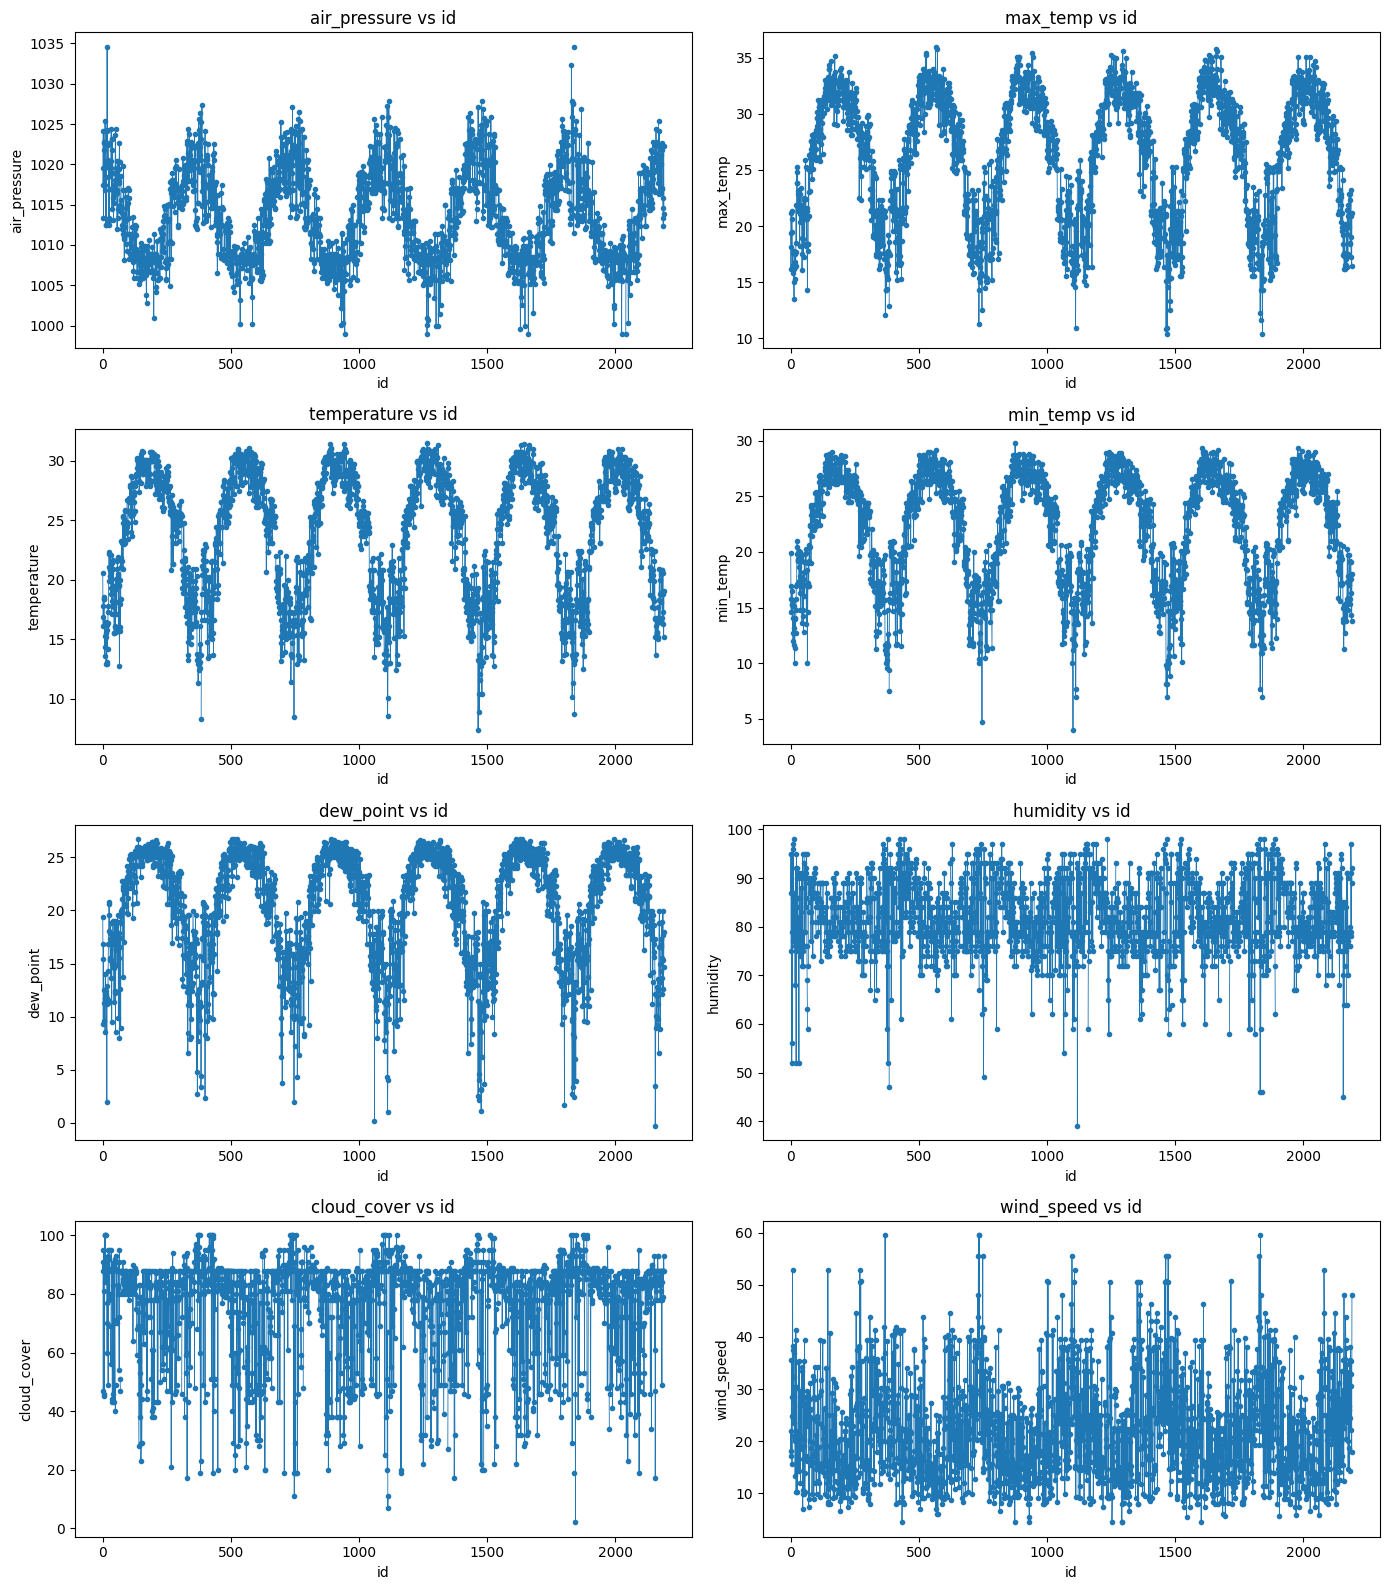


Correlation of numeric features with ID (abs descending):


,corr_with_ID
recorded_day,0.166666
wind_speed,0.024180
min_temp,0.016492
humidity,-0.015268
temperature,0.013400
max_temp,0.011163
air_pressure,-0.008796
cloud_cover,0.008713
dew_point,0.006797



Imputation decisions per column:


,imputation_method
recorded_day,median
air_pressure,median
max_temp,median
temperature,median
min_temp,median
dew_point,median
humidity,median
cloud_cover,median
wind_speed,median



Remaining missing values after imputation (non-zero shown):


Series([], dtype: int64)


Detected target/label column for coloring (if any): raining


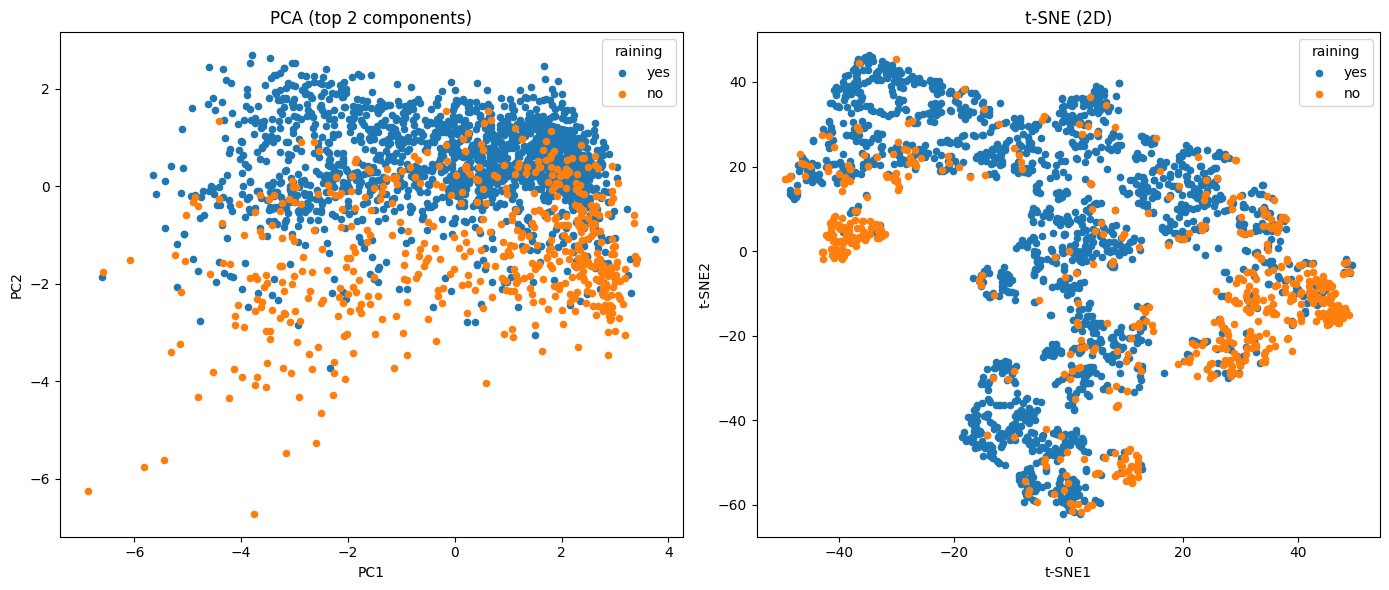


Separation heuristic score - PCA: 0.580, t-SNE: 0.355

Saved imputed dataset to rainfall_data_imputed.csv


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

path = "rainfall_data.csv"
df = pd.read_csv(path)

print("Loaded dataset shape:", df.shape)
display(df.head())

desc = df.describe(include='all').transpose()
print("\nDescriptive statistics (df.describe()):")
display(desc)

id_col = None
for candidate in ['ID','Id','id','index','Index']:
    if candidate in df.columns:
        id_col = candidate
        break
if id_col is None:
    first = df.columns[0]
    if pd.api.types.is_integer_dtype(df[first]):
        id_col = first
    else:
        id_col = df.columns[0]

print("\nUsing ID column:", id_col)

missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
missing_df = pd.concat([missing, missing_percent], axis=1)
missing_df.columns = ['missing_count','missing_percent']
print("\nMissing values summary (showing columns with any missing):")
display(missing_df[missing_df['missing_count']>0])

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns detected:", numeric_cols)

plot_cols = [c for c in numeric_cols if c != 'recorded_day' and c != id_col]
plot_cols = plot_cols[:8]
print("\nColumns to plot against ID (up to 8):", plot_cols)

fig, axs = plt.subplots(4,2, figsize=(14,16))
axs = axs.flatten()
for i, col in enumerate(plot_cols):
    axs[i].plot(df[id_col], df[col], marker='.', linewidth=0.6)
    axs[i].set_title(f"{col} vs {id_col}")
    axs[i].set_xlabel(id_col)
    axs[i].set_ylabel(col)

for j in range(len(plot_cols), len(axs)):
    axs[j].axis('off')
plt.tight_layout()
plt.show()

corr_with_id = {}
for col in numeric_cols:
    if col == id_col: continue
    valid = df[[col, id_col]].dropna()
    if valid.shape[0] > 1:
        corr = valid[col].corr(valid[id_col])
    else:
        corr = np.nan
    corr_with_id[col] = corr

corr_df = pd.Series(corr_with_id).sort_values(key=lambda s: s.abs(), ascending=False).to_frame(name='corr_with_ID')
print("\nCorrelation of numeric features with ID (abs descending):")
display(corr_df)

df_imputed = df.copy()
impute_decisions = {}
for col, corr in corr_with_id.items():
    if pd.isna(corr):
        method = 'median'
    elif abs(corr) > 0.5:
        method = 'interpolate'
    else:
        method = 'median'
    impute_decisions[col] = method
    if method == 'interpolate':
        df_imputed = df_imputed.sort_values(id_col)
        df_imputed[col] = df_imputed[col].interpolate(method='linear', limit_direction='both')
        df_imputed = df_imputed.sort_index()
    else:
        median_val = df_imputed[col].median()
        df_imputed[col] = df_imputed[col].fillna(median_val)

print("\nImputation decisions per column:")
display(pd.Series(impute_decisions).to_frame('imputation_method'))

remaining_missing = df_imputed.isnull().sum()
print("\nRemaining missing values after imputation (non-zero shown):")
display(remaining_missing[remaining_missing>0])

possible_targets = [c for c in df.columns if (df[c].dtype == 'object' or df[c].nunique() < 10) and c.lower() not in [id_col.lower(),'recorded_day']]
target_col = None
if len(possible_targets) > 0:
    for c in possible_targets:
        if df[c].nunique() >=2 and df[c].nunique() <= 20:
            target_col = c
            break
if target_col is None:
    for c in numeric_cols:
        if c == id_col: continue
        if df[c].nunique() >=2 and df[c].nunique() <= 10:
            target_col = c
            break

print("\nDetected target/label column for coloring (if any):", target_col)

features = [c for c in numeric_cols if c != id_col]
X = df_imputed[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

perplexity = 30 if X_scaled.shape[0] > 30 else max(5, int(X_scaled.shape[0]/3))
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, init='pca')
X_tsne = tsne.fit_transform(X_scaled)

fig, axes = plt.subplots(1,2,figsize=(14,6))
if target_col is not None:
    labels = df[target_col].astype(str)
    unique_labels = labels.unique()
    axes[0].set_title("PCA (top 2 components)")
    for lab in unique_labels:
        idx = labels == lab
        axes[0].scatter(X_pca[idx,0], X_pca[idx,1], label=str(lab), s=20)
    axes[0].legend(title=target_col)
    axes[0].set_xlabel("PC1"); axes[0].set_ylabel("PC2")
    axes[1].set_title("t-SNE (2D)")
    for lab in unique_labels:
        idx = labels == lab
        axes[1].scatter(X_tsne[idx,0], X_tsne[idx,1], label=str(lab), s=20)
    axes[1].legend(title=target_col)
    axes[1].set_xlabel("t-SNE1"); axes[1].set_ylabel("t-SNE2")
else:
    axes[0].scatter(X_pca[:,0], X_pca[:,1], s=8)
    axes[0].set_title("PCA (top 2 components) — no label detected")
    axes[0].set_xlabel("PC1"); axes[0].set_ylabel("PC2")
    axes[1].scatter(X_tsne[:,0], X_tsne[:,1], s=8)
    axes[1].set_title("t-SNE (2D) — no label detected")
    axes[1].set_xlabel("t-SNE1"); axes[1].set_ylabel("t-SNE2")

plt.tight_layout()
plt.show()

from sklearn.metrics import pairwise_distances
def separation_score(embedding, labels):
    labs = np.array(labels)
    classes = np.unique(labs)
    if len(classes) < 2:
        return np.nan
    intra = []
    inter = []
    for cls in classes:
        pts = embedding[labs==cls]
        if pts.shape[0] > 1:
            intra.append(np.mean(pairwise_distances(pts)))
    means = np.array([embedding[labs==cls].mean(axis=0) for cls in classes])
    for i in range(len(classes)):
        for j in range(i+1,len(classes)):
            inter.append(np.linalg.norm(means[i]-means[j]))
    mean_intra = np.mean(intra) if len(intra)>0 else np.nan
    mean_inter = np.mean(inter) if len(inter)>0 else np.nan
    return mean_inter / mean_intra if mean_intra and mean_intra>0 else np.nan

if target_col is not None:
    score_pca = separation_score(X_pca, df[target_col].astype(str).values)
    score_tsne = separation_score(X_tsne, df[target_col].astype(str).values)
    print(f"\nSeparation heuristic score - PCA: {score_pca:.3f}, t-SNE: {score_tsne:.3f}")
else:
    print("\nNo label detected so class separation heuristic not computed.")

df_imputed.to_csv("rainfall_data_imputed.csv", index=False)
print("\nSaved imputed dataset to rainfall_data_imputed.csv")

Comments on the pattern for all the features:- 
(i) air_pressure vs id:- It shows cyclic and periodic increasing and decreasing of the air pressure.
(ii) max_temp vs id:- This also shows periodic pattern but the peaks are more smooth amd troughs are spikey.
(iii) temperature vs id, min_temp vs id and dew_point vs id:- These also shows same pariodic pattern with even more sharper troughs and smoother peaks.

For missing values, we have computed the correlation of the features and applied interpolation if correlation > 0.5 else took median. For our case, every correlation value was less than 0.5 so we took median for all the missing values.

As seen in the plot for PCA and t- SNE(top 2 principal components), PCA has better class separation. This is also confirmed by their heuristic score.

Using target column: raining
X shape: (2190, 8) Positive class fraction: 0.7534246575342466
VIF table:
        feature        VIF        R2
0   temperature  65.358366  0.984700
1      min_temp  39.598860  0.974747
2      max_temp  29.185612  0.965737
3     dew_point  10.643668  0.906047
4  air_pressure   2.953692  0.661441
5      humidity   1.777954  0.437556
6   cloud_cover   1.708932  0.414839
7    wind_speed   1.162338  0.139665
Baseline 5-fold ROC-AUC scores: [0.90429293 0.83787879 0.86978114 0.89660494 0.86596521]
Average ROC-AUC (full features): 0.874904601571268
drop_3: dropped ['temperature', 'min_temp', 'max_temp'], mean ROC-AUC: 0.8727
drop_6: dropped ['temperature', 'min_temp', 'max_temp', 'dew_point', 'air_pressure', 'humidity'], mean ROC-AUC: 0.8581
drop_8: no features left after dropping 8. Skipping.
PCA 1 components -> mean ROC-AUC: 0.5562
PCA 3 components -> mean ROC-AUC: 0.8672
PCA 6 components -> mean ROC-AUC: 0.8770

Summary:
   method  avg_roc_auc
0    full     0.87

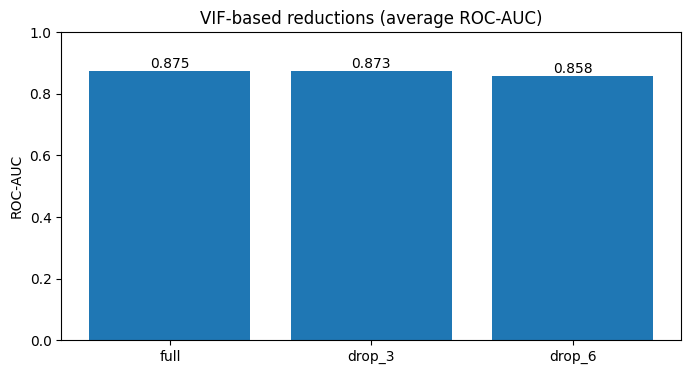

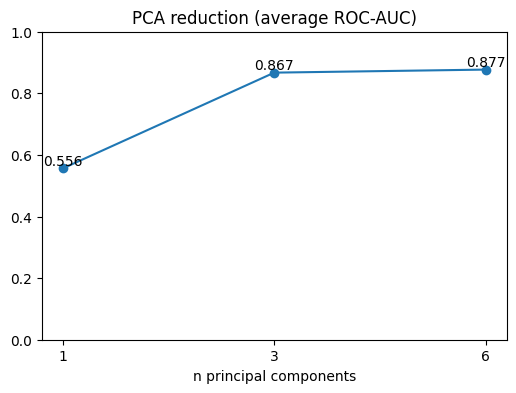

In [31]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


CSV_PATH = "rainfall_data.csv"   # change if needed
SAVE_SUMMARY = "logistic_vif_pca_results.csv"
SAVE_VIF = "vif_table.csv"
CV_FOLDS = 5
RANDOM_STATE = 42
N_JOBS = 1   


df = pd.read_csv(CSV_PATH)
id_col = next((c for c in ['ID','Id','id','index','Index'] if c in df.columns), df.columns[0])
non_feature_cols = {id_col, 'recorded_day'}

target_col = None
if 'raining' in df.columns:
    target_col = 'raining'
else:
    for t in ['RainTomorrow','rain_tomorrow','Rain_Tomorrow','rainTomorrow','raintomorrow','rain_next_day','rain']:
        if t in df.columns:
            target_col = t; break
if target_col is None:
    for c in df.columns:
        if c not in non_feature_cols and df[c].nunique()==2:
            target_col = c; break
if target_col is None:
    raise ValueError("No binary target detected automatically. Please set `target_col` manually.")

print("Using target column:", target_col)

X = df.drop(columns=list(non_feature_cols) + [target_col]).select_dtypes(include=[np.number])
y = df[target_col].copy()

imp = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

if y.dtype == 'object' or y.dtype == 'bool':
    y = pd.Categorical(y).codes
unique_y = np.unique(y)
if len(unique_y) != 2:
    raise ValueError("Target is not binary after conversions.")
if set(unique_y) != {0,1}:
    vals = sorted(unique_y)
    mapping = {vals[0]: 0, vals[1]: 1}
    y = pd.Series(y).map(mapping).astype(int).values
else:
    y = pd.Series(y).astype(int).values

print("X shape:", X_imputed.shape, "Positive class fraction:", y.mean())

scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

from sklearn.linear_model import LinearRegression
vif_list = []
for col in X_std.columns:
    others = X_std.drop(columns=[col]).values
    target = X_std[col].values
    lr = LinearRegression().fit(others, target)
    r2 = lr.score(others, target)
    vif = 1.0 / (1.0 - r2) if (1.0 - r2) > 1e-12 else np.inf
    vif_list.append((col, vif, r2))
vif_df = pd.DataFrame(vif_list, columns=['feature','VIF','R2']).sort_values('VIF', ascending=False).reset_index(drop=True)
print("VIF table:")
print(vif_df)

clf = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(solver='liblinear', max_iter=500, class_weight='balanced'))])
cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE)
scores_full = cross_val_score(clf, X_imputed, y, cv=cv, scoring='roc_auc', n_jobs=N_JOBS)
print("Baseline 5-fold ROC-AUC scores:", scores_full)
print("Average ROC-AUC (full features):", scores_full.mean())

features_sorted = vif_df['feature'].tolist()
drop_configs = {'drop_3': features_sorted[:3], 'drop_6': features_sorted[:6], 'drop_8': features_sorted[:8]}

vif_results = {}
for name, drops in drop_configs.items():
    X_red = X_imputed.drop(columns=drops)
    if X_red.shape[1] < 1:
        print(f"{name}: no features left after dropping {len(drops)}. Skipping.")
        vif_results[name] = np.nan
        continue
    sc = cross_val_score(clf, X_red, y, cv=cv, scoring='roc_auc', n_jobs=N_JOBS)
    vif_results[name] = sc.mean()
    print(f"{name}: dropped {drops}, mean ROC-AUC: {vif_results[name]:.4f}")

from sklearn.decomposition import PCA
pca_results = {}
for n in [1,3,6]:
    if n > X_std.shape[1]:
        pca_results[n] = np.nan
        print(f"PCA {n}: skip (n > n_features).")
        continue
    pca = PCA(n_components=n, random_state=RANDOM_STATE)
    X_pca = pca.fit_transform(X_std.values)
    lr = LogisticRegression(solver='liblinear', max_iter=500, class_weight='balanced')
    sc = cross_val_score(lr, X_pca, y, cv=cv, scoring='roc_auc', n_jobs=N_JOBS)
    pca_results[n] = sc.mean()
    print(f"PCA {n} components -> mean ROC-AUC: {pca_results[n]:.4f}")

summary = [('full', scores_full.mean())] + [(k, v) for k,v in vif_results.items()] + [(f'pca_{k}', v) for k,v in pca_results.items()]
summary_df = pd.DataFrame(summary, columns=['method','avg_roc_auc'])
print("\nSummary:")
print(summary_df)
summary_df.to_csv(SAVE_SUMMARY, index=False)
vif_df.to_csv(SAVE_VIF, index=False)
print("Saved:", SAVE_SUMMARY, SAVE_VIF)

# Plotting (ROC-AUC bars for VIF and PCA)
plt.figure(figsize=(8,4))
plt.bar(['full'] + list(vif_results.keys()), [scores_full.mean()] + [vif_results[k] for k in vif_results])
plt.ylim(0,1); plt.title("VIF-based reductions (average ROC-AUC)"); plt.ylabel("ROC-AUC")
for i,v in enumerate([scores_full.mean()] + [vif_results[k] for k in vif_results]):
    plt.text(i, v+0.01, f"{v:.3f}", ha='center')
plt.show()

plt.figure(figsize=(6,4))
pcs = sorted(pca_results.keys()); vals = [pca_results[k] for k in pcs]
plt.plot([str(k) for k in pcs], vals, marker='o')
plt.title("PCA reduction (average ROC-AUC)"); plt.ylim(0,1); plt.xlabel("n principal components")
for i,v in enumerate(vals): plt.text(i, v+0.01, f"{v:.3f}", ha='center')
plt.show()


We see that the features temperature, min_temp and max_temp have very high multi collinearity. Also feature dew point has pretty high multi collinearity.

The ROC- AUC value of the model is good. Drpping 3 features reduces it slightly and dropping 6 features further reduces it. The PCA with 6 components performs best, PCA 3 is also decent but PCA is poor.

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


top3_vif_features = vif_df['feature'][:3].tolist()
X_vif_reduced = X_imputed.drop(columns=top3_vif_features)
print("Dropped columns:", top3_vif_features)
print("Remaining features:", list(X_vif_reduced.columns))


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe_plain = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(solver='liblinear', max_iter=500))
])

auc_plain = cross_val_score(pipe_plain, X_vif_reduced, y,
                            cv=cv, scoring='roc_auc').mean()
print(f"ROC-AUC (no balancing): {auc_plain:.4f}")


pipe_balanced = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(solver='liblinear', max_iter=500,
                              class_weight='balanced'))
])

auc_balanced = cross_val_score(pipe_balanced, X_vif_reduced, y,
                               cv=cv, scoring='roc_auc').mean()
print(f"ROC-AUC (class_weight='balanced'): {auc_balanced:.4f}")


auc_smote = []
smote = SMOTE(random_state=42)

for train_idx, test_idx in cv.split(X_vif_reduced, y):
    X_train, X_test = X_vif_reduced.iloc[train_idx], X_vif_reduced.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Apply SMOTE on training fold
    X_res, y_res = smote.fit_resample(X_train, y_train)
    
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(solver='liblinear', max_iter=500))
    ])
    score = cross_val_score(model, X_res, y_res, cv=5, scoring='roc_auc').mean()
    auc_smote.append(score)

auc_smote = np.mean(auc_smote)
print(f"ROC-AUC (SMOTE oversampling): {auc_smote:.4f}")


results = pd.DataFrame({
    'Model': ['Baseline (no balancing)', "class_weight='balanced'", 'SMOTE oversampling'],
    'Avg ROC-AUC': [auc_plain, auc_balanced, auc_smote]
})
print("\nComparison of imbalance-handling methods:")
print(results)


if auc_balanced >= auc_smote:
    print("\nRecommended: Use Logistic Regression with class_weight='balanced'")
    print(f"Reason: Simpler and achieves similar or better ROC-AUC ({auc_balanced:.4f}) vs SMOTE ({auc_smote:.4f})")
else:
    print("\nSMOTE slightly better but more complex — consider only if your data isn’t time-series.")


Dropped columns: ['temperature', 'min_temp', 'max_temp']
Remaining features: ['air_pressure', 'dew_point', 'humidity', 'cloud_cover', 'wind_speed']
ROC-AUC (no balancing): 0.8735
ROC-AUC (class_weight='balanced'): 0.8727
ROC-AUC (SMOTE oversampling): 0.8739

Comparison of imbalance-handling methods:
                     Model  Avg ROC-AUC
0  Baseline (no balancing)     0.873513
1  class_weight='balanced'     0.872716
2       SMOTE oversampling     0.873890

SMOTE slightly better but more complex — consider only if your data isn’t time-series.


After dropping 5 features, the model still gives almost similar ROC- AUC compared to the full model. So, we should drop 3 features with the highest VIF columns. This is in multicollinearity, a high VIF value indicates a strong correlation between a predictor variable and other predictor variables in the model. So, we dropped temperature, min_temp and max_temp.


Although ROC_ AUC value of both these models are almost similar to the model before handeling imbalance, there is a slight improvement in ROC_ AUC of SMOTE because it synthesizes new data points for the minority class, providing the model with more information to learn from.